In [663]:
import numpy as np
from matplotlib import pyplot as plt

In [665]:
font = {'family': 'monospace',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

<h3>[Problem 1] Linear function<h3>

In [667]:
x_ndarray = np.arange(-50, 50.1, 0.1).reshape(1001, 1)
y_ndarray = (1 / 2) * x_ndarray + 1

<h3>[Problem 2] Array combination<h3>

In [669]:
data1 = np.concatenate((x_ndarray, y_ndarray), axis = 1)

print("data shape: {}".format(data1.shape))
print(data1)

data shape: (1001, 2)
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


<h3>[Problem 3] Find the gradient<h3>

In [671]:
d_x_ndarray = data1[1:, 0] - data1[:-1, 0]
d_y_ndarray = data1[1:, 1] - data1[:-1, 1]
data1_gradient = d_y_ndarray / d_x_ndarray

print("data shape: {}".format(data1_gradient.shape))
print(data1_gradient)

data shape: (1000,)
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

<h3>Problem 4] Draw a graph<h3>

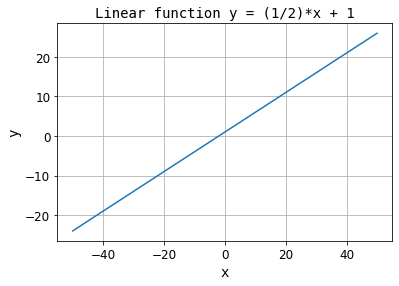

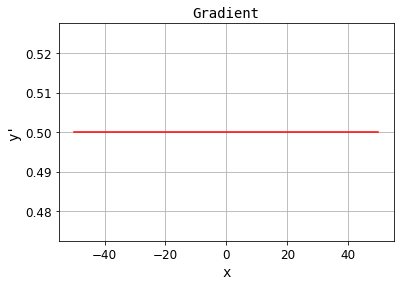

In [673]:
plt.grid()
plt.title("Linear function y = (1/2)*x + 1", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.tick_params(labelsize=12)
plt.plot(data1[:, 0], data1[:, 1])
plt.show()

plt.grid()
plt.title("Gradient", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y'", fontdict=font)
plt.tick_params(labelsize=12)
plt.plot(data1[:-1, 0], data1_gradient, color="red")
plt.show()

<h3>[Problem 5] Python functionalization<h3>

In [675]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.
    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange ().
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    row = int(np.ceil((x_range[1] - x_range[0]) / x_range[2]))
    array_x = np.arange(x_range[0], x_range[1], x_range[2]).reshape(row, 1)
    array_xy = np.concatenate((array_x, function), axis = 1)

    d_x = array_xy[1:, 0] - array_xy[:-1, 0]
    d_y = array_xy[1:, 1] - array_xy[:-1, 1]

    gradient = d_y / d_x

    return array_xy, gradient

In [677]:
def function1(array_x):
    x = array_x.reshape(array_x.shape[0], 1).astype(np.float64)
    return x**2

def function2(array_x):
    x = array_x.reshape(array_x.shape[0], 1).astype(np.float64)
    return 2*(x**2) + 2**x

def function3(array_x):
    x = array_x.reshape(array_x.shape[0], 1).astype(np.float64)
    return np.sin(x**(1/2))

In [679]:
start_array_x1 = -50
stop_array_x1 = 50.1
step_array_x1 = 0.1

start_array_x2 = 0
stop_array_x2 = 50.1
step_array_x2 = 0.1

In [681]:
array_x1 = np.arange(start_array_x1, stop_array_x1, step_array_x1)
array_x2 = np.arange(start_array_x2, stop_array_x2, step_array_x2)

array_xy_func1, gradient_func1 = compute_gradient(function1(array_x1), (start_array_x1, stop_array_x1, step_array_x1))
array_xy_func2, gradient_func2 = compute_gradient(function2(array_x1), (start_array_x1, stop_array_x1, step_array_x1))
array_xy_func3, gradient_func3 = compute_gradient(function3(array_x2), (start_array_x2, stop_array_x2, step_array_x2))

print("array_xy_func1 shape: {}     gradient_func1 shape: {}".format(array_xy_func1.shape, gradient_func1.shape))
print("array_xy_func2 shape: {}     gradient_func2 shape: {}".format(array_xy_func2.shape, gradient_func2.shape))
print("array_xy_func3 shape: {}     gradient_func3 shape: {}".format(array_xy_func3.shape, gradient_func3.shape))

array_xy_func1 shape: (1001, 2)     gradient_func1 shape: (1000,)
array_xy_func2 shape: (1001, 2)     gradient_func2 shape: (1000,)
array_xy_func3 shape: (501, 2)     gradient_func3 shape: (500,)


In [683]:
print(array_xy_func1)

[[ -50.   2500.  ]
 [ -49.9  2490.01]
 [ -49.8  2480.04]
 ...
 [  49.8  2480.04]
 [  49.9  2490.01]
 [  50.   2500.  ]]


In [685]:
print(array_xy_func2)

[[-5.00000000e+01  5.00000000e+03]
 [-4.99000000e+01  4.98002000e+03]
 [-4.98000000e+01  4.96008000e+03]
 ...
 [ 4.98000000e+01  9.80152798e+14]
 [ 4.99000000e+01  1.05050176e+15]
 [ 5.00000000e+01  1.12589991e+15]]


In [687]:
print(array_xy_func3)

[[ 0.          0.        ]
 [ 0.1         0.31098359]
 [ 0.2         0.43245484]
 ...
 [49.8         0.69880548]
 [49.9         0.70385354]
 [50.          0.70886129]]


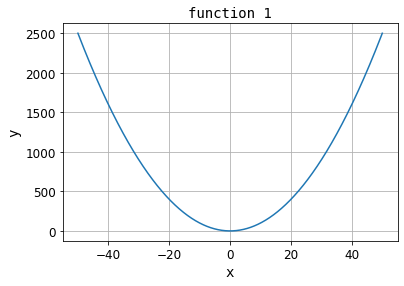

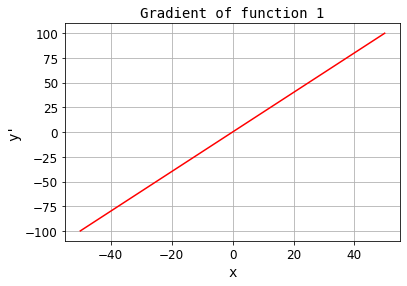

In [689]:
plt.grid()
plt.title("function 1", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.tick_params(labelsize=12)
plt.plot(array_xy_func1[:, 0], array_xy_func1[:, 1])
plt.show()

plt.grid()
plt.title("Gradient of function 1", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y'", fontdict=font)
plt.tick_params(labelsize=12)
plt.plot(array_xy_func1[:-1, 0], gradient_func1, color="red")
plt.show()

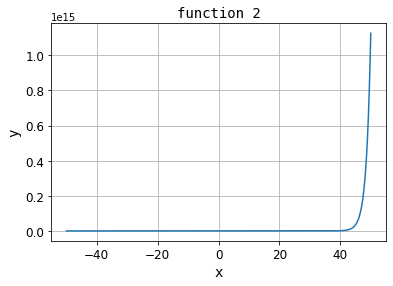

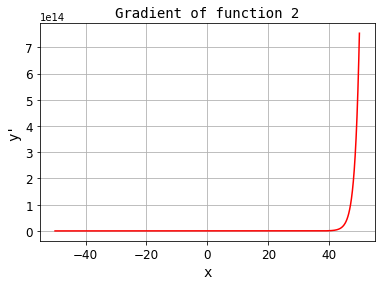

In [690]:
plt.grid()
plt.title("function 2", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.tick_params(labelsize=12)
plt.plot(array_xy_func2[:, 0], array_xy_func2[:, 1])
plt.show()

plt.grid()
plt.title("Gradient of function 2", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y'", fontdict=font)
plt.tick_params(labelsize=12)
plt.plot(array_xy_func2[:-1, 0], gradient_func2, color="red")
plt.show()

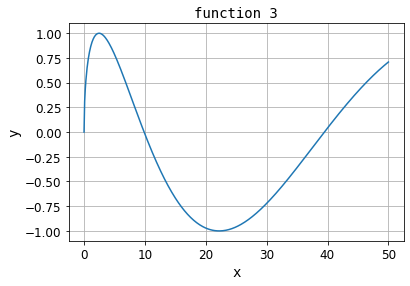

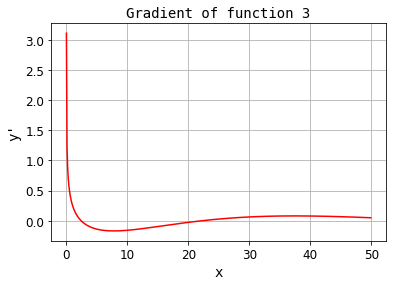

In [691]:
plt.grid()
plt.title("function 3", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y", fontdict=font)
plt.tick_params(labelsize=12)
plt.plot(array_xy_func3[:, 0], array_xy_func3[:, 1])
plt.show()

plt.grid()
plt.title("Gradient of function 3", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("y'", fontdict=font)
plt.tick_params(labelsize=12)
plt.plot(array_xy_func3[:-1, 0], gradient_func3, color="red")
plt.show()

<h3>[Problem 6] Find the minimum value<h3>

In [692]:
idx_min_func1 = array_xy_func1[:, 1].argmin()
x_min_func1, y_min_func1 = array_xy_func1[idx_min_func1, 0], array_xy_func1[:, 1].min()
slope_before_min_func1, slope_after_min_func1 = gradient_func1[idx_min_func1 - 1], gradient_func1[idx_min_func1]

print("Minimun value of function 1 y_min = {}  at x = {}".format(y_min_func1, x_min_func1))
print("Gradient before and after minimum y is {} and {}, respectively".format(slope_before_min_func1, slope_after_min_func1))

Minimun value of function 1 y_min = 5.048709793414476e-25  at x = 7.105427357601002e-13
Gradient before and after minimum y is -0.09999999999858034 and 0.1000000000014225, respectively


In [693]:
idx_min_func2 = array_xy_func2[:, 1].argmin()
x_min_func2, y_min_func2 = array_xy_func2[idx_min_func2, 0], array_xy_func2[:, 1].min()
slope_before_min_func2, slope_after_min_func2 = gradient_func2[idx_min_func2 - 1], gradient_func2[idx_min_func2]

print("Minimun value of function 2 y_min = {}  at x = {}".format(y_min_func2, x_min_func2))
print("Gradient before and after minimum y is {} and {}, respectively".format(slope_before_min_func2, slope_after_min_func2))

Minimun value of function 2 y_min = 0.9505505632959851  at x = -0.1999999999992923
Gradient before and after minimum y is -0.4170183305979998 and 0.024824282409972788, respectively


In [694]:
idx_min_func3 = array_xy_func3[:, 1].argmin()
x_min_func3, y_min_func3 = array_xy_func3[idx_min_func3, 0], array_xy_func3[:, 1].min()
slope_before_min_func3, slope_after_min_func3 = gradient_func3[idx_min_func3 - 1], gradient_func3[idx_min_func3]

print("Minimun value of function 3 y_min = {}  at x = {}".format(y_min_func3, x_min_func3))
print("Gradient before and after minimum y is {} and {}, respectively".format(slope_before_min_func3, slope_after_min_func3))

Minimun value of function 3 y_min = -0.9999997540298113  at x = 22.200000000000003
Gradient before and after minimum y is -0.0006388422559544435 and 0.0004874477930660974, respectively
